In [2]:
import pandas as pd


df = pd.read_csv('Static_dataset.csv')

In [3]:
df.info()

print('\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [4]:
df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [5]:
df.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [6]:
fdf = df.drop('timestamp', axis=1)

fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  longest_word      268066 non-null  object 
 11  sld               268074 non-null  object 
 12  len               268074 non-null  int64  
 13  subdomain         268074 non-null  int64  
 14  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 30.7+ MB


In [7]:
print('No Attack', round(fdf['Target Attack'].value_counts()[0]/len(df)* 100,2), '% of the dataset')
print('Attack', round(fdf['Target Attack'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Attack 45.1 % of the dataset
Attack 54.9 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Attack || 1: Attack)')

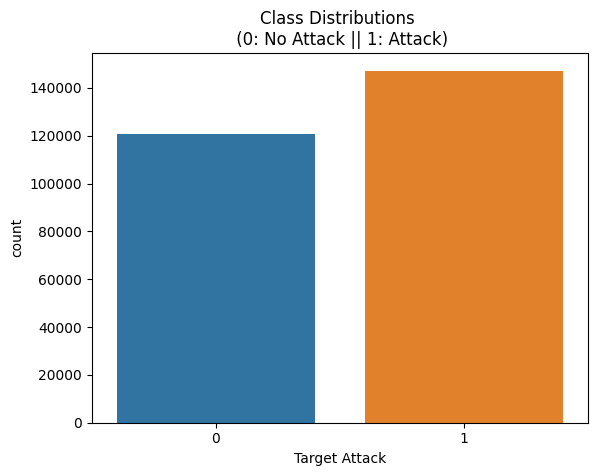

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target Attack', data=fdf)
plt.title('Class Distributions \n (0: No Attack || 1: Attack)')

(2.0, 36.0)

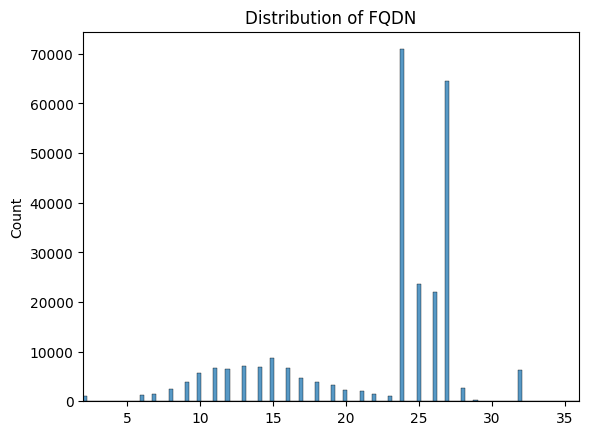

In [9]:
import numpy as np

FQDN = fdf['FQDN_count'].values

sns.histplot(FQDN)
plt.title('Distribution of FQDN')
plt.xlim([min(FQDN), max(FQDN)])

In [10]:
categorical_columns = fdf.select_dtypes(include=['object']).columns.tolist()

print('categorical_columns:', categorical_columns, '\n')

numerical_columns = fdf.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('numerical_columns:', numerical_columns)

categorical_columns: ['longest_word', 'sld'] 

numerical_columns: ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain', 'Target Attack']


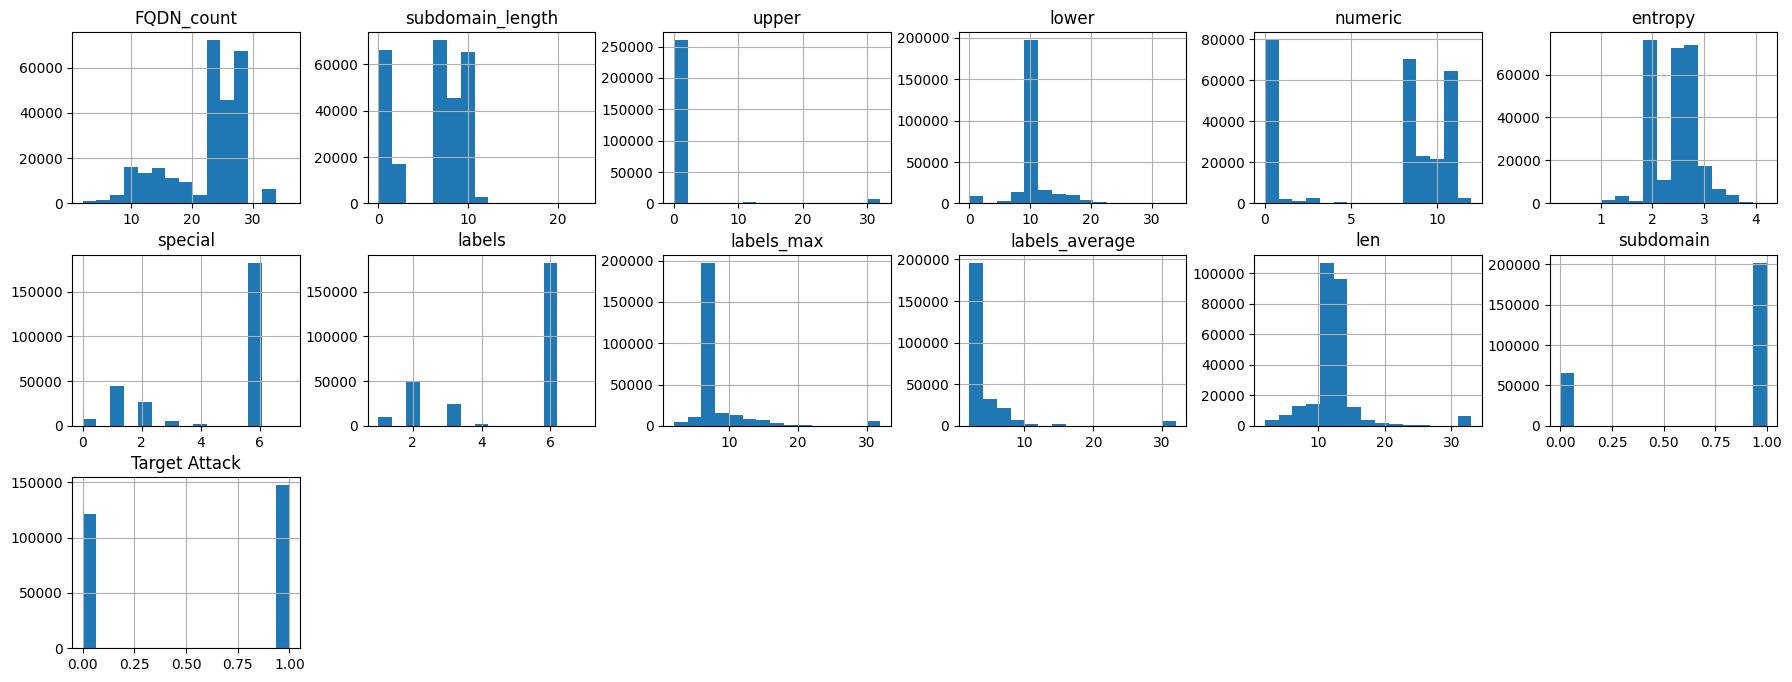

In [11]:
fdf[numerical_columns].hist(bins=15, figsize=(22, 8), layout=(3,6));
#Histogram show dist of numeric feat

In [12]:
from sklearn.model_selection import train_test_split

#remove target from list
numerical_list = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain']

X = fdf[numerical_list + categorical_columns] #features
y = fdf['Target Attack'] #label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [13]:
print(y_test.value_counts(normalize=True))
print('\n')
print(X_train.value_counts(normalize=True))
print('\n')

print(y_train.value_counts(normalize=True))
print('\n')

print(X_test.value_counts(normalize=True))
#X.info()
#print('\n')
#y.info()

1    0.550201
0    0.449799
Name: Target Attack, dtype: float64


FQDN_count  subdomain_length  upper  lower  numeric  entropy   special  labels  labels_max  labels_average  len  subdomain  longest_word  sld         
24          7                 0      10     8        2.054029  6        6       7           3.166667        11   1          4             224             0.261742
27          10                0      10     11       2.570417  6        6       7           3.666667        14   1          2             192             0.147110
                                                     2.767195  6        6       7           3.666667        14   1          2             192             0.087204
26          9                 0      10     10       2.742338  6        6       7           3.500000        13   1          2             192             0.080591
25          8                 0      10     9        2.556642  6        6       7           3.333333        12   1          2      

In [14]:
#from sklearn import preprocessing
#pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-1
)

numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_list),
    ],
    verbose_feature_names_out=False
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

rf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['longest_word', 'sld']),
                                                 ('num', SimpleImputer(),
                                                  ['FQDN_count',
                                                   'subdomain_length', 'upper',
                                                   'lower', 'numeric',
                                                   'entropy', 'special',
                                                   'labels', 'labels_max',
                                                   'labels_average', 'len',
                                                   'subdomain'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
y_pred = rf.predict(X_test)

In [16]:
print(f"Train accuray: {rf.score(X_train, y_train):.3f}")
print(f"Test accuray: {rf.score(X_test, y_test):.3f}")

Train accuray: 0.826
Test accuray: 0.827


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



Accuracy:  0.8270260188380117




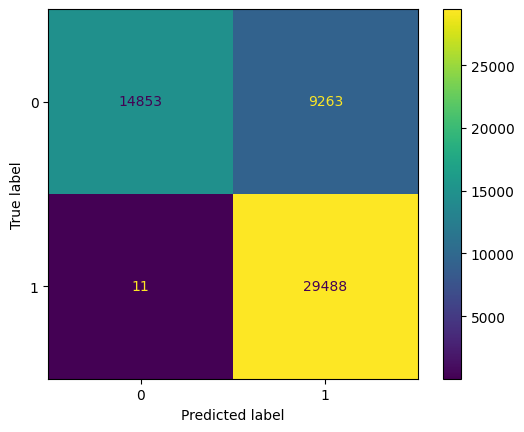

In [17]:
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
 #f1_score, recall, precision

print('Classification report:\n' , classification_report(y_test, y_pred))

print('\n')

# Print the accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

print('\n')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()


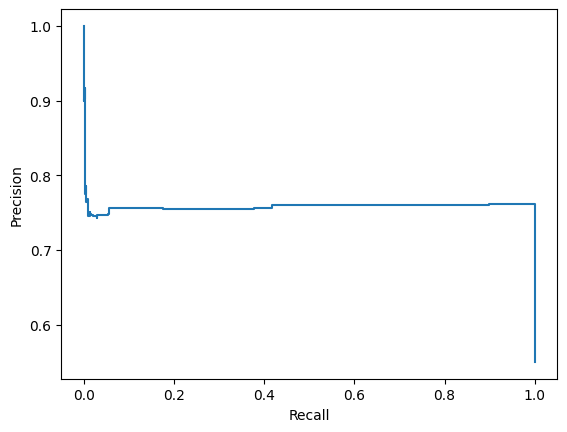

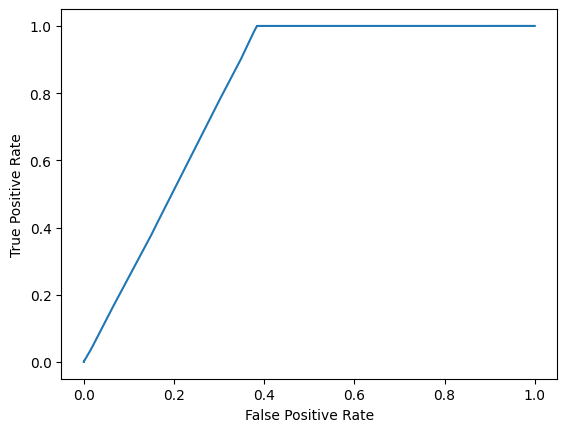

In [18]:
y_scores = rf.predict_proba(X_test)[:, 1] # extracting probabilities of positive class

print('PR CURVE')
precision, recall, _ = metrics.precision_recall_curve(y_test, y_scores)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('\n')

print('ROC CURVE')
fpr, tpr, _ = metrics.roc_curve(y_test, y_scores)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
#hyperparameter tuning and cross validation
"""
n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
"""

from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)



In [ ]:
#best parameters
print('Best parameters:', grid_search.best_params_)

print('Best score:', grid_search.best_score_)

best_model = grid_search.best_estimator_

In [ ]:
#Feature importance using permutation importance

In [ ]:
#Visualizing the tree
import pydot
import graphviz
from sklearn.tree import export_graphviz
#from IPython.display import Image

#for i in range(3):
     #tree =  rf.estimators_[i]

rfc = rf.named_steps['classifier']
tree = rfc.estimators_[0]

feature_names = rf.named_steps['preprocess'].get_feature_names_out()

# Export the image to a dot file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_names, proportion=True)

graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
import pickle

# Specify filename
filename = 'random_forest_model.sav'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved as {filename}")


In [ ]:
#checking if preprocessing worked

X_tr_trans = rf.named_steps['preprocess'].transform(X_train)

print(np.isnan(X_tr_trans[:, :len(numerical_columns)]).any(), '\n')

# Assuming that all categorical features were originally of type 'object'
print(np.issubdtype(X_tr_trans[:, len(categorical_columns)].dtype, np.integer))


In [ ]:
# Check the data type of the NumPy array
print(X_tr_trans.dtype)
